In [3]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
import time
import datetime
import csv
import cv2
import keyboard


In [28]:
# import data
data_array = np.genfromtxt('offset_test_5.csv', delimiter=',', skip_header=2, usecols=[0,1,2,3,5,6,7])
# convert unix to zeroed session time
start_time = data_array[0,0]
end_time = data_array[-1,0]
data_array[:,0] = (data_array[:,0]-start_time)/1000




### ADD SESSION DATE AS SHOWN IN FIRST FRAME OF VIDEO ###
session_date = datetime.date(2023,1,12) # [year,month,day]
session_start_time = [15,0,41,283] # [hour,minute,second,millisecond]



# convert to time format
session_start_time = datetime.time(session_start_time[0],session_start_time[1],session_start_time[2],session_start_time[3]*1000)
# combine with session date
session_start_time = datetime.datetime.combine(session_date,session_start_time)
# convert to unix time
session_start_unixtime = time.mktime(session_start_time.timetuple())*1000 + session_start_time.microsecond/1000

#print(session_start_unixtime)





# Open the video file
video = cv2.VideoCapture('offset_test_5.mov')
#fps = video.get(cv2.CAP_PROP_FPS)
fps = 120
print(fps)

# Create an empty list to store the frames
frames = []

# Iterate over the frames of the video
while video.isOpened():
    # Read the next frame
    ret, frame = video.read()

    # If the frame was not read properly, break the loop
    if not ret:
        break

    # Add the frame to the list
    frames.append(frame)
    
    if len(frames)>2000:
        break

# Release the video capture object
video.release()

# Now you can access the frames using their index in the list,
# for example:
# first_frame = frames[0]
# second_frame = frames[1]
# etc.

120


In [29]:
i = 0
TO_array = np.array([])

while True:
    current_frame = frames[i]
    cv2.imshow("frame", current_frame)
    cv2.waitKey(500)
    
    
    # Use arrowkeys to nagivate through frames
    if keyboard.is_pressed('right'):
        i += 20
        if i>len(frames):
            i = len(frames)-1
    if keyboard.is_pressed('left'):
        i -= 20
        if i<0:
            i = 0
    if keyboard.is_pressed('up'):  
        i += 1
        if i>len(frames):
            i = 0        
    if keyboard.is_pressed('down'):  
        i -= 1
        if i<0:
            i = 0
            
    # Use 't' to label a TO event
    if keyboard.is_pressed('t'):
        current_frame_unixtime = i*1000/fps + session_start_unixtime
        TO_array = np.append(TO_array, current_frame_unixtime)
            
    # Use 'q' to exit window
    if keyboard.is_pressed('q'):
        break

        
cv2.destroyAllWindows()
print(TO_array)

[1.67355366e+12]


In [9]:
print(TO_array)
#print((TO_array-start_time)/1000)

[1.67355366e+12]


[7.69246997]


<function matplotlib.pyplot.show(close=None, block=None)>

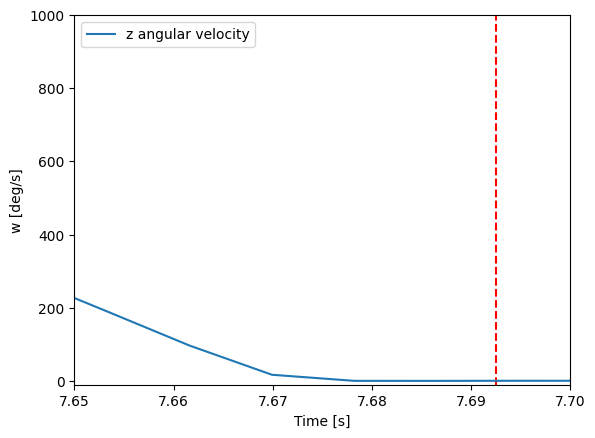

In [31]:
# standardize to match session time
TO_times = (TO_array - start_time)/1000
print(TO_times)


fig1 = plt.figure()

# Write labels to csv
labelled_df = pd.read_csv('offset_test_5.csv', skiprows=0)
labelled_df.drop(labelled_df.tail(1).index,inplace=True) # drop last n rows
labelled_col = np.zeros(labelled_df.shape[0])
#print(len(labelled_col))

for TO in TO_times:
    plt.axvline(TO, color='r', linestyle='--')
    #labelled_col[data_array[:,0]>TO][0] = data_array[data_array[:,0]>TO][0,0]
    labelled_col[np.logical_and((TO+0.05)>data_array[:,0],data_array[:,0]>(TO-0.05))] = 1.0


labelled_df['TOE OFF?'] = labelled_col.tolist()

# Adjust Unix time to session time in output csv

labelled_df.iloc[1:,0] = data_array[:-1,0].tolist()
labelled_df.to_csv('labelled_0.csv', index=False)

plt.plot(data_array[:,0], data_array[:,6], label = 'z angular velocity')
#plt.plot(data_array[:,0], data_array[:6], label = 'x linear accel')

#plt.axis([0,18, -1000,1000])
plt.axis([7.65,7.7, -10,1000])

    
plt.xlabel("Time [s]")
plt.ylabel("w [deg/s]")
    
plt.legend()

plt.show
